In [12]:
# Run this cell first and then answer the questions given in the assignment.

import numpy as np
import pandas as pd

np.random.seed(42)

# Generating sample data
data = {
    'Order Value': np.random.normal(100, 20, 30),
    'Customer Rating': np.random.normal(4, 0.5, 30),
    'Shipping Time (Days)': np.random.randint(1, 10, 30)
}

# Introducing missing values and outliers on purpose
data['Order Value'][np.random.choice(30, 8, replace=False)] = np.nan
data['Customer Rating'][np.random.choice(30, 7, replace=False)] = np.nan

data['Order Value'][np.random.choice(30, 7, replace=False)] = [300, 400, 300, 350, 400, 450, 700]
data['Customer Rating'][np.random.choice(30, 5, replace=False)] = [1, 5, 0.5, 5.5, 1]

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Order Value,Customer Rating,Shipping Time (Days)
0,109.934283,3.699147,2
1,97.234714,4.926139,1
2,112.953771,3.993251,7
3,130.460597,NaN,7
4,NaN,1.000000,8
5,95.317261,NaN,5
6,400.000000,4.104432,3
7,700.000000,3.020165,8
8,90.610512,3.335907,6
9,350.000000,NaN,3


In [3]:
## Use pandas to identify and count the number of missing values in the dataset.

# isna() returns a boolean mask of whether each cell is missing; sum() count missing values per column 
missing_counts = df.isna().sum()
print("\n=== Missing Value Count Per Column ===")
print(missing_counts)


=== Missing Value Count Per Column ===
Order Value             6
Customer Rating         5
Shipping Time (Days)    0
dtype: int64


In [25]:
## Generate a summary table showing the percentage of missing values for each feature. 

missing_pct = df.isna().sum() * 100 
missing_summary = pd.DataFrame({
    "missing_counts": missing_counts, 
    "missing_pct": missing_pct.round(2) 
})
print("\n=== Missing Value Summary (Count & %) ===")
print(missing_summary) 



=== Missing Value Summary (Count & %) ===
                      missing_counts  missing_pct
Order Value                        6          600
Customer Rating                    5          500
Shipping Time (Days)               0            0


In [26]:
## Implement different strategies for handling missing data like drop rows or columns with missing values 

# Strategy A - Dropping rows with ANY missing values 
df_drop_rows = df.dropna() # .dropna() remove any row that has at least one row 
print("\n === Strategy A: Drop Rows with Any NaNs ===") 
print("new shape:", df_drop_rows.shape)
print("Remaining NaNs: \n", df_drop_rows.isna().sum())


 === Strategy A: Drop Rows with Any NaNs ===
new shape: (19, 3)
Remaining NaNs: 
 Order Value             0
Customer Rating         0
Shipping Time (Days)    0
dtype: int64


In [28]:
## Strategy B - Implementing rows with NaNs with the mean 

df_fill_mean = df.copy()
df_fill_mean = df_fill_mean.fillna(df_fill_mean.mean(numeric_only=True)) # .fillna() fill the missing values with the mean
print("\n=== Strategy B: Fill with the Mean ===")
print("Remaining NaNs:\n", df_fill_mean.isna().sum())


=== Strategy B: Fill with the Mean ===
Remaining NaNs:
 Order Value             0
Customer Rating         0
Shipping Time (Days)    0
dtype: int64


In [29]:
## Strategy C: Implementing Rows with NaNs with median 
df_fill_median = df.copy()
df_fill_median = df_fill_median.fillna(df_fill_median.median(numeric_only=True))
print("\n=== Strategy C: Fill NaNs with Medians ===")
print("Remaining NaNs:\n", df_fill_median.isna().sum())


=== Strategy C: Fill NaNs with Medians ===
Remaining NaNs:
 Order Value             0
Customer Rating         0
Shipping Time (Days)    0
dtype: int64


In [34]:
## Strategy D: Implementing row with NaNs with mode 

df_fill_mode = df.copy()
mode_values = df_fill_mode.mode(numeric_only=True).iloc[0] # for the first most common mode per column
df_fill_mode = df_fill_mode.fillna(mode_values)
print("\n === Strategy D: Fill NaNs with Mode ===")
print("Remaining NaNs:\n", df_fill_mode.isna().sum())


 === Strategy D: Fill NaNs with Mode ===
Remaining NaNs:
 Order Value             0
Customer Rating         0
Shipping Time (Days)    0
dtype: int64


In [36]:
## Quick Comparison of how many rows remain (drop strategies) vs how many NaNs remain (fill strategies) 
print("\n=== Quick Strategy Comparison ===")
print({
    "Original Shape": df.shape, 
    "drop_rows_shape": df_drop_rows.shape, 
    "fill_mean_remaining_nans": int(df_fill_mean.isna().sum().sum()),
    "fill_median_remaining_nans": int(df_fill_median.isna().sum().sum()),
    "fill_mode_remaining_nans": int(df_fill_mode.isna().sum().sum()), 
})


=== Quick Strategy Comparison ===
{'Original Shape': (30, 3), 'drop_rows_shape': (19, 3), 'fill_mean_remaining_nans': 0, 'fill_median_remaining_nans': 0, 'fill_mode_remaining_nans': 0}


n\ === Plotting Histogram ===


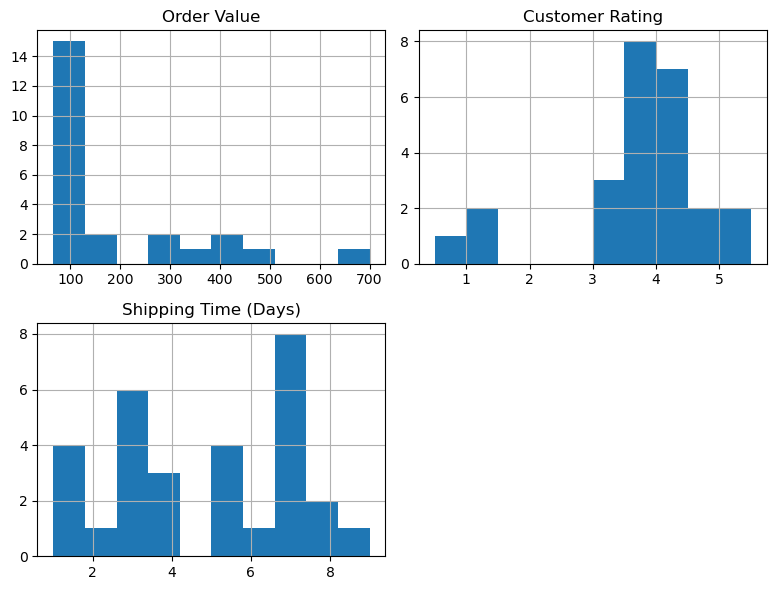

In [38]:
## Visualize the distribution of each feature using box plots, histograms, and scatter plots. 
import matplotlib.pyplot as plt 

# Histograms 
print("n\ === Plotting Histogram ===") 
df.hist(bins=10, figsize=(8,6))
plt.tight_layout()
plt.show()

In [51]:
## Z-Score

# We should impute before Z-scores so NaNs don't propagate. Median is robust, so we'll use df_fill_median.
df_for_outliers = df_fill_median.copy()  # Choose the imputed dataset to analyze
numeric_cols = df_for_outliers.select_dtypes(include='number').columns  # numeric columns only

# Compute Z-scores per column manually (equivalent to scipy.stats.zscore with nan_policy='omit')
# z = (x - mean) / std ; ddof=0 for population std is fine here
means = df_for_outliers[numeric_cols].mean()
stds = df_for_outliers[numeric_cols].std(ddof=0)

# Avoid division by zero in constant columns
stds_replaced = stds.replace(0, np.nan)

# Compute absolute Z-score DataFrame (rows x numeric columns)
z_df = (df_for_outliers[numeric_cols] - means) / stds_replaced
abs_z_df = z_df.abs()

# Choose threshold for \"extreme\" (common choice: 3.0 standard deviations)
z_thresh = 3.0  # Fixed: removed the extra space at the beginning of this line

# A row is considered an outlier if ANY numeric feature exceeds the threshold
outlier_mask = (abs_z_df > z_thresh).any(axis=1)
outliers_found = df_for_outliers[outlier_mask]
df_no_outliers = df_for_outliers[~outlier_mask]

print("n=== Z-Score Outlier Detection (on MEDIAN-imputed data) ===")
print(f"Threshold: |z| > {z_thresh}")
print(f"Outliers found: {outliers_found.shape[0]} out of {df_for_outliers.shape[0]} rows")
print("Indices of outliers:", outliers_found.index.tolist())
print("\nOutlier rows (preview):")
print(outliers_found.head())

print("\n=== Data After Removing Outliers ===")
print("New shape:", df_no_outliers.shape)

n=== Z-Score Outlier Detection (on MEDIAN-imputed data) ===
Threshold: |z| > 3.0
Outliers found: 1 out of 30 rows
Indices of outliers: [7]

Outlier rows (preview):
   Order Value  Customer Rating  Shipping Time (Days)
7        700.0         3.020165                     8

=== Data After Removing Outliers ===
New shape: (29, 3)
